<a href="https://colab.research.google.com/github/theill95/HFF/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we consider the codes for studying scale invariant patterns, aswell as computations required to develop trading strategies.

# **Scaling Law**

This is the code required to show the relationship proposed by [Guillame et. al (1997)](https://www.researchgate.net/publication/24055492_From_the_Bird's_Eye_to_the_Microscope_A_Survey_of_New_Stylized_Facts_of_the_Intra-daily_Foreign_Exchange_Markets).

We consider 1 month worth of data for the EURUSD sampled between 04/07/2023 - 04/08/2023, for the intervals: 1 minute, 10 minutes, and 1 hour.

In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## **1 minute**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1744.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.06e-64
Time:                        14:50:37   Log-Likelihood:                -10.563
No. Observations:                 100   AIC:                             25.13
Df Residuals:                      98   BIC:                             30.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3132      0.233     -9.916      0.0

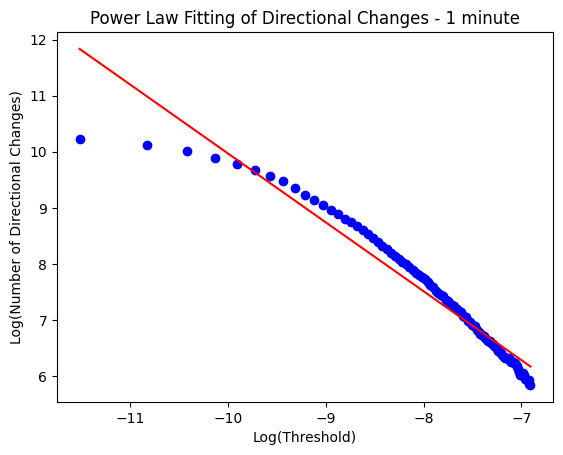

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_1minute_DC.csv')

# Define variables
X = df[['Threshold']].values
y = df['Number of Directional Changes'].values

# Transform to log-log scale
log_X = np.log(X)
log_y = np.log(y)

# Add a constant term for the intercept
log_X = sm.add_constant(log_X)

# Fit an ordinary least squares (OLS) model
model = sm.OLS(log_y, log_X).fit()

# Print summary statistics, including p-values
print(model.summary())

# Predict log_y based on the model
log_y_pred = model.predict(log_X)

# Plot the original data and the fitted line in log-log scale
plt.scatter(log_X[:, 1], log_y, color='blue')
plt.plot(log_X[:, 1], log_y_pred, color='red')
plt.xlabel('Log(Threshold)')
plt.ylabel('Log(Number of Directional Changes)')
plt.title('Power Law Fitting of Directional Changes - 1 minute')
plt.show()

# Get the summary as LaTeX
latex_summary = model.summary().as_latex()

# Write to a .tex file
with open('ols_results.tex', 'w') as file:
    file.write(latex_summary)

## **10 minutes**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1744.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.06e-64
Time:                        13:33:38   Log-Likelihood:                -10.563
No. Observations:                 100   AIC:                             25.13
Df Residuals:                      98   BIC:                             30.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3132      0.233     -9.916      0.0

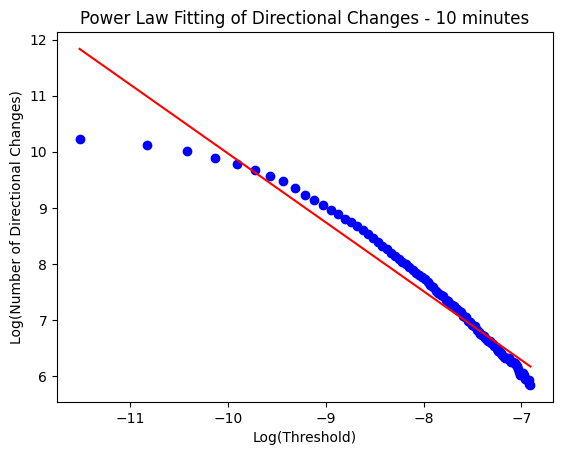

In [ ]:
# Load data
df2 = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_10minute_DC.csv')

# Define variables
X2 = df2[['Threshold']].values
y2 = df2['Number of Directional Changes'].values

# Transform to log-log scale
log_X2 = np.log(X2)
log_y2 = np.log(y2)

# Add a constant term for the intercept
log_X2 = sm.add_constant(log_X2)

# Fit an ordinary least squares (OLS) model
model2 = sm.OLS(log_y2, log_X2).fit()

# Print summary statistics, including p-values
print(model2.summary())

# Predict log_y based on the model
log_y_pred2 = model2.predict(log_X2)

# Plot the original data and the fitted line in log-log scale
plt.scatter(log_X2[:, 1], log_y2, color='blue')
plt.plot(log_X2[:, 1], log_y_pred2, color='red')
plt.xlabel('Log(Threshold)')
plt.ylabel('Log(Number of Directional Changes)')
plt.title('Power Law Fitting of Directional Changes - 10 minutes')
plt.show()

## **1 hour**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1744.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.06e-64
Time:                        13:35:40   Log-Likelihood:                -10.563
No. Observations:                 100   AIC:                             25.13
Df Residuals:                      98   BIC:                             30.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3132      0.233     -9.916      0.0

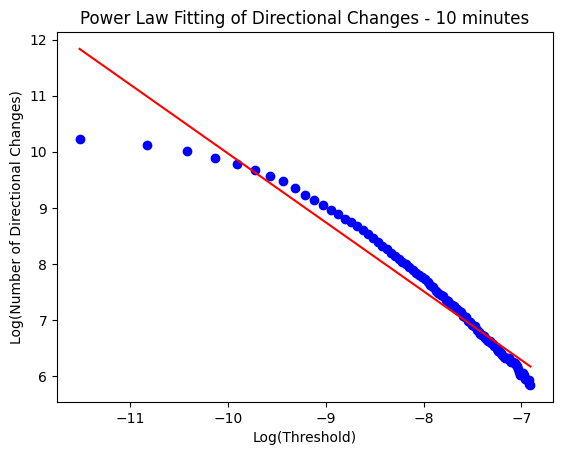

In [ ]:
# Load data
df3 = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_1hour_DC.csv')

# Define variables
X3 = df3[['Threshold']].values
y3 = df3['Number of Directional Changes'].values

# Transform to log-log scale
log_X3 = np.log(X3)
log_y3 = np.log(y3)

# Add a constant term for the intercept
log_X3 = sm.add_constant(log_X3)

# Fit an ordinary least squares (OLS) model
model3 = sm.OLS(log_y2, log_X3).fit()

# Print summary statistics, including p-values
print(model3.summary())

# Predict log_y based on the model
log_y_pred3 = model3.predict(log_X3)

# Plot the original data and the fitted line in log-log scale
plt.scatter(log_X3[:, 1], log_y3, color='blue')
plt.plot(log_X3[:, 1], log_y_pred3, color='red')
plt.xlabel('Log(Threshold)')
plt.ylabel('Log(Number of Directional Changes)')
plt.title('Power Law Fitting of Directional Changes - 10 minutes')
plt.show()

# **Trading Strategies**

In this section, we will explore two different trading strategies. All data processing will be done here in python, while optimization and implementation will be done in the cTrader platform. For the specific cTrader codes, please refer to the GitHub.

In [ ]:
# Load libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## **Data Processing**

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_1minute.csv')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Convert 'Timestamp' to unix timestamp (in seconds)
df['Timestamp'] = df['Timestamp'].astype(int) / 10**9

# Compute mid price
df['Mid'] = (df['Bid'] + df['Ask']) / 2

# Calculate directional changes
df['Direction'] = df['Mid'].diff().apply(lambda x: 1 if x > 0 else 0)

# Calculate SMA for different time periods
for period in [5, 14, 30]:
    df[f'SMA_{period}'] = df['Mid'].rolling(window=period).mean()

# Calculate RSI for different time periods
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

for period in [7, 14, 28]:
    df[f'RSI_{period}'] = calculate_rsi(df['Mid'], window=period)

# Remove rows with NaN
df.dropna(inplace=True)


## **XGBoost**

In [ ]:
# Reduce size
df = df.sort_values('Timestamp').tail(10000)

# Prepare data
features = df.drop(columns=['Direction'])
labels = df['Direction']

# Split data into train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Define hyperparameters to tune
parameters = {
    'n_estimators': [100, 200, 300],  # Number of gradient boosted trees. Equivalent to number of boosting rounds.
    'learning_rate': [0.01, 0.05, 0.1],  # Boosting learning rate (xgb’s “eta”)
    'max_depth': [3, 4, 5, 6],  # Maximum tree depth for base learners.
    'subsample': [0.8, 0.9, 1],  # Subsample ratio of the training instance.
    'colsample_bytree': [0.8, 0.9, 1],  # Subsample ratio of columns when constructing each tree.
    'gamma': [0, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_lambda': [0.01, 0.1],  # L2 regularization term on weights
    'reg_alpha': [0.1, 0.5],  # L1 regularization term on weights
}

# Instantiate model
model = xgb.XGBClassifier(eval_metric='logloss')

# Instantiate GridSearchCV and fit model
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

# Output best parameters from Grid Search
print("Best parameters found: ", clf.best_params_)

# Predict on validation set
y_val_pred = clf.predict(X_val)

# Evaluate model on validation set
print("Validation set report")
print(classification_report(y_val, y_val_pred))
print("Validation set ROC AUC: ", roc_auc_score(y_val, y_val_pred))

# Predict on test set
y_test_pred = clf.predict(X_test)

# Evaluate model on test set
print("Test set report")
print(classification_report(y_test, y_test_pred))
print("Test set ROC AUC: ", roc_auc_score(y_test, y_test_pred))

# Save model for later use
clf.best_estimator_.save_model('xgb_model.json')


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 1}
Validation set report
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       114
           1       0.59      0.47      0.52        86

    accuracy                           0.63       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.62      0.63      0.62       200

Validation set ROC AUC:  0.609751121991024
Test set report
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       101
           1       0.68      0.51      0.58        99

    accuracy                           0.64       200
   macro avg       0.65      0.64      0.63       200
weighted avg       0.65      0.64      0.63       200

Test set ROC AUC:  0.63

## **First Attempt Logistic Regression**

In [ ]:
# Reduce size
df = df.sort_values('Timestamp').tail(1000)

# Prepare data
features = df.drop(columns=['Direction'])
labels = df['Direction']

# Split data into train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Define hyperparameters to tune
parameters = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Instantiate model
model = LogisticRegression(random_state=42, max_iter=5000)

# Instantiate GridSearchCV and fit model
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

# Output best parameters from Grid Search
print("Best parameters found: ", clf.best_params_)

# Predict on validation set
y_val_pred = clf.predict(X_val)

# Evaluate model on validation set
print("Validation set report")
print(classification_report(y_val, y_val_pred))
print("Validation set ROC AUC: ", roc_auc_score(y_val, y_val_pred))

# Predict on test set
y_test_pred = clf.predict(X_test)

# Evaluate model on test set
print("Test set report")
print(classification_report(y_test, y_test_pred))
print("Test set ROC AUC: ", roc_auc_score(y_test, y_test_pred))

# Save model for later use
import joblib
joblib.dump(clf.best_estimator_, 'logistic_regression_model.pkl')

Fitting 5 folds for each of 44 candidates, totalling 220 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters found:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Validation set report
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       114
           1       0.59      0.53      0.56        86

    accuracy                           0.64       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.64      0.64      0.64       200

Validation set ROC AUC:  0.6270909832721339
Test set report
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       101
           1       0.65      0.59      0.62        99

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200

Test set ROC AUC:  0.6394639463946394


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['logistic_regression_model.pkl']

In [ ]:
# Extract coefficients
coefficients = clf.best_estimator_.coef_

# Extract intercept
intercept = clf.best_estimator_.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", intercept)

Coefficients:  [[-4.49782909e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.65833488e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.52171766e-02  0.00000000e+00  4.96728571e-03]]
Intercept:  [0.]


In [ ]:
df.tail()

,Timestamp,Ask,Bid,Volume,Year,Month,Day,DayOfWeek,Hour,Mid,Direction,SMA_5,SMA_14,SMA_30,RSI_7,RSI_14,RSI_28
11353,1.701907e+09,1.07645,1.07635,0.000009,2023,12,6,2,23,1.07640,1,1.076358,1.076379,1.076372,52.380952,55.263158,48.913043
11354,1.701907e+09,1.07645,1.07635,0.000009,2023,12,6,2,23,1.07640,0,1.076378,1.076375,1.076370,64.705882,41.379310,52.325581
11355,1.701907e+09,1.07643,1.07633,0.000009,2023,12,6,2,23,1.07638,0,1.076382,1.076373,1.076369,78.571429,44.444444,54.878049
11356,1.701907e+09,1.07645,1.07635,0.000009,2023,12,6,2,23,1.07640,1,1.076392,1.076373,1.076370,81.250000,50.000000,59.493671
11357,1.701907e+09,1.07634,1.07624,0.000009,2023,12,6,2,23,1.07629,0,1.076374,1.076365,1.076370,33.333333,35.897436,48.809524


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it's already defined

# Define the coefficients and intercept from your logistic regression model
coefficients = np.array([-4.49782909e-10, 0, 0, 0, -4.65833488e-04, 0, 0, 0, 0, 0, 0, 0, 0, 2.52171766e-02, 0, 4.96728571e-03])
intercept = 0

# Remove the 'Direction' column from your features and get the first 1000 rows
df_subset = df.drop('Direction', axis=1).iloc[:10000]

# Calculate the prediction for each row
log_odds = np.dot(df_subset, coefficients.T) + intercept
predictions = 1 / (1 + np.exp(-log_odds))

# Find the mean of the predictions
mean_prediction = predictions.mean()
print("Mean prediction: ", mean_prediction)


Mean prediction:  0.467690610962249


Implementation did not produce satisfactory results.

## **Final Logistic Model**

In [ ]:
import pandas as pd
import numpy as np

# Load data from CSV and parse Timestamp with day first
data = pd.read_csv("/content/drive/MyDrive/EURUSD_1month_1minute.csv", parse_dates=['Timestamp'], dayfirst=True)

# Drop the Volume column
data.drop('Volume', axis=1, inplace=True)

# Set the Timestamp as index
data.set_index('Timestamp', inplace=True)

# Calculate mid price
data['mid'] = (data['Ask'] + data['Bid']) / 2

# Compute the directional change
data['direction'] = np.where(data['mid'].diff() > 0, 1, 0)


# Lag the magnitude and direction columns
lags = 3  # you can adjust this as required
for i in range(1, lags + 1):
    data[f"lagged_magnitude_{i}"] = data["mid"].pct_change().shift(i)
    data[f"lagged_direction_{i}"] = data["direction"].shift(i)

# Define different periods for indicators
periods = [5, 10, 15, 20]

# Moving Averages, Momentum, RSI
for period in periods:
    data[f'sma_{period}'] = data['mid'].rolling(window=period).mean()
    data[f'ema_{period}'] = data['mid'].ewm(span=period, adjust=False).mean()
    data[f'momentum_{period}'] = data['mid'] - data['mid'].shift(period)

    delta = data['mid'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    data[f'rsi_{period}'] = 100 - (100 / (1 + rs))

# MACD
data['ema_12'] = data['mid'].ewm(span=12, adjust=False).mean()
data['ema_26'] = data['mid'].ewm(span=26, adjust=False).mean()
data['macd'] = data['ema_12'] - data['ema_26']
data['signal_line'] = data['macd'].ewm(span=9, adjust=False).mean()
data['macd_diff'] = data['macd'] - data['signal_line']
data['macd_direction'] = np.where(data['macd_diff'].diff() > 0, 1, 0)
data['macd_crossover'] = np.where((data['macd'] > data['signal_line']) & (data['macd'].shift(1) <= data['signal_line'].shift(1)), 1, np.where((data['macd'] < data['signal_line']) & (data['macd'].shift(1) >= data['signal_line'].shift(1)), -1, 0))

# ROC
data['roc'] = ((data['mid'] - data['mid'].shift(5)) / data['mid'].shift(5)) * 100

# Historical Volatility
data['hist_volatility'] = data['mid'].pct_change().rolling(window=5).std()

# Stochastic Oscillator
low_min = data['mid'].rolling(window=5).min()
high_max = data['mid'].rolling(window=5).max()
data['stochastic'] = (data['mid'] - low_min) / (high_max - low_min)
data['stochastic_signal'] = data['stochastic'].rolling(window=3).mean()

# Interaction Terms: For demonstration, we'll introduce interactions between some EMAs, SMAs, and RSI.
# You can expand upon this idea for other combinations that you believe might have synergistic effects.
for period in periods:
    data[f'ema_sma_interaction_{period}'] = data[f'ema_{period}'] * data[f'sma_{period}']
    data[f'ema_rsi_interaction_{period}'] = data[f'ema_{period}'] * data[f'rsi_{period}']
    data[f'sma_rsi_interaction_{period}'] = data[f'sma_{period}'] * data[f'rsi_{period}']



# Drop NaN rows
data.dropna(inplace=True)

In [ ]:
data.describe()

,Ask,Bid,mid,direction,magnitude,lagged_magnitude_1,lagged_direction_1,lagged_magnitude_2,lagged_direction_2,lagged_magnitude_3,...,sma_rsi_interaction_5,ema_sma_interaction_10,ema_rsi_interaction_10,sma_rsi_interaction_10,ema_sma_interaction_15,ema_rsi_interaction_15,sma_rsi_interaction_15,ema_sma_interaction_20,ema_rsi_interaction_20,sma_rsi_interaction_20
count,30918.000000,30918.000000,30918.000000,30918.000000,3.091800e+04,3.091800e+04,30918.000000,3.091800e+04,30918.000000,3.091800e+04,...,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000,30918.000000
mean,1.084050,1.083950,1.084000,0.466169,6.483133e-07,6.691893e-07,0.466524,6.593894e-07,0.467042,6.579072e-07,...,54.842670,1.175143,54.790344,54.789983,1.175139,54.777173,54.776806,1.175135,54.772500,54.772133
std,0.009721,0.009721,0.009721,0.498862,1.069516e-04,1.070393e-04,0.498886,1.071142e-04,0.498921,1.071139e-04,...,29.638214,0.021056,21.096873,21.095959,0.021056,17.185345,17.184195,0.021056,14.799767,14.798443
min,1.066390,1.066290,1.066340,0.000000,-2.580265e-03,-2.580265e-03,0.000000,-2.580265e-03,0.000000,-2.580265e-03,...,0.000000,1.137633,0.000000,0.000000,1.137650,0.000000,0.000000,1.137750,4.438821,4.439625
25%,1.075390,1.075290,1.075340,0.000000,-4.598769e-05,-4.599023e-05,0.000000,-4.599552e-05,0.000000,-4.599552e-05,...,32.270640,1.156277,39.754885,39.754154,1.156251,42.689764,42.691085,1.156237,44.447512,44.450830
50%,1.086580,1.086480,1.086530,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,54.600800,1.180581,54.665184,54.664618,1.180592,54.629304,54.631650,1.180572,54.705791,54.706482
75%,1.092450,1.092350,1.092400,1.000000,4.639284e-05,4.639736e-05,1.000000,4.640705e-05,1.000000,4.640705e-05,...,77.714475,1.193331,69.670198,69.666411,1.193329,66.792098,66.790923,1.193321,65.135900,65.135478
max,1.101160,1.101060,1.101110,1.000000,1.984814e-03,1.984814e-03,1.000000,1.984814e-03,1.000000,1.984814e-03,...,110.057200,1.211528,109.611057,109.611500,1.211441,109.606490,109.601667,1.211350,109.139624,109.137900


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

train = data.sample(frac=0.8, random_state=42)
test = data.drop(train.index)

# Prepare data for modeling
X_train = train.drop('direction', axis=1)
y_train = train['direction']
X_test = test.drop('direction', axis=1)
y_test = test['direction']

# It's good practice to standardize features before training logistic regression with regularization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with cross-validation and L2 regularization (Ridge)
model = LogisticRegressionCV(cv=5, penalty='l2', max_iter=10000, random_state=42).fit(X_train_scaled, y_train)

# Coefficients
coefficients = model.coef_[0]

# Create a dataframe to display and save coefficients
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

# Print ranked coefficients
print(coeff_df)
y_test_pred = model.predict(X_test_scaled)
print("Test set ROC AUC: ", roc_auc_score(y_test, y_test_pred))

                   Feature  Coefficient
9                    sma_5 -1705.932121
0                      Ask  1283.136259
1                      Bid  1283.136259
2                      mid  1283.136259
36   ema_sma_interaction_5  -706.334712
10                   ema_5  -515.619461
22                  ema_20  -459.649173
18                  ema_15  -389.355481
39  ema_sma_interaction_10   364.203451
25                  ema_12  -323.450650
26                  ema_26  -323.328681
14                  ema_10  -310.612757
13                  sma_10   246.436295
42  ema_sma_interaction_15   216.261131
45  ema_sma_interaction_20   112.405146
21                  sma_20   -94.182290
17                  sma_15    39.811842
3       lagged_magnitude_1   -22.803809
11              momentum_5   -21.491343
32                     roc    18.901605
5       lagged_magnitude_2   -14.077428
38   sma_rsi_interaction_5   -12.394645
37   ema_rsi_interaction_5    10.249042
29               macd_diff    -9.735769


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature importances
feature_importances = rf.feature_importances_

# Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Create a dataframe to display and rank feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Rank features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print ranked features
print(importance_df)

Accuracy: 0.93
ROC AUC Score: 0.98
                   Feature  Importance
34              stochastic    0.333639
30          macd_direction    0.088285
35       stochastic_signal    0.060934
3       lagged_magnitude_1    0.054528
37   ema_rsi_interaction_5    0.032749
38   sma_rsi_interaction_5    0.028175
4       lagged_direction_1    0.026596
5       lagged_magnitude_2    0.025494
32                     roc    0.025407
12                   rsi_5    0.022747
11              momentum_5    0.019825
7       lagged_magnitude_3    0.017004
16                  rsi_10    0.013475
33         hist_volatility    0.011940
44  sma_rsi_interaction_15    0.011631
29               macd_diff    0.011567
41  sma_rsi_interaction_10    0.011467
43  ema_rsi_interaction_15    0.011294
46  ema_rsi_interaction_20    0.011058
19             momentum_15    0.010932
20                  rsi_15    0.010841
24                  rsi_20    0.010301
47  sma_rsi_interaction_20    0.010142
40  ema_rsi_interaction_10   

In [ ]:
# List of features to retain
important_features = [
    'stochastic',
    'macd_direction',
    'stochastic_signal',
    'lagged_magnitude_1',
    'ema_rsi_interaction_5',
    'sma_rsi_interaction_5',
    'lagged_direction_1',
    'lagged_magnitude_2',
    'roc',
    'rsi_5',
    'momentum_5',
    'lagged_magnitude_3'
]

# Creating the subset
data_important = data[important_features]

data_important.describe()

,stochastic,macd_direction,stochastic_signal,lagged_magnitude_1,ema_rsi_interaction_5,sma_rsi_interaction_5,lagged_direction_1,lagged_magnitude_2,roc,rsi_5,momentum_5,lagged_magnitude_3
count,30918.000000,30918.000000,30918.000000,3.091800e+04,30918.000000,30918.000000,30918.000000,3.091800e+04,30918.000000,30918.000000,30918.000000,3.091800e+04
mean,0.505912,0.501811,0.506065,6.691893e-07,54.842975,54.842670,0.466524,6.593894e-07,0.000328,50.594412,0.000004,6.579072e-07
std,0.419439,0.500005,0.334967,1.070393e-04,29.638766,29.638214,0.498886,1.071142e-04,0.023961,27.340430,0.000260,1.071139e-04
min,0.000000,0.000000,0.000000,-2.580265e-03,0.000000,0.000000,0.000000,-2.580265e-03,-0.385033,0.000000,-0.004180,-2.580265e-03
25%,0.000000,0.000000,0.198278,-4.599023e-05,32.270337,32.270640,0.000000,-4.599552e-05,-0.010199,29.855592,-0.000110,-4.599552e-05
50%,0.500000,1.000000,0.509259,0.000000e+00,54.600541,54.600800,0.000000,0.000000e+00,0.000000,50.000000,0.000000,0.000000e+00
75%,1.000000,1.000000,0.818182,4.639736e-05,77.717899,77.714475,1.000000,4.640705e-05,0.011085,71.428571,0.000120,4.640705e-05
max,1.000000,1.000000,1.000000,1.984814e-03,110.057446,110.057200,1.000000,1.984814e-03,0.269635,100.000000,0.002880,1.984814e-03


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming you have already loaded and preprocessed the data
# Also assuming the target variable is named 'direction' in your original data dataframe

# Splitting data into train and test sets
X = data_important
y = data['direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression with cross-validation
clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=10000).fit(X_train, y_train)

# Predictions and scoring
y_pred_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test set ROC AUC: {roc_auc}")

# Displaying coefficients
coefs = pd.DataFrame({
    'Feature': data_important.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefs)
mean_pred = y_pred_prob.mean()
print(f"Mean predicted probability on test set: {mean_pred}")

Test set ROC AUC: 0.9465344984391282
                  Feature  Coefficient
0              stochastic    10.113808
1          macd_direction     0.624125
8                     roc     0.512754
4   ema_rsi_interaction_5     0.030804
5   sma_rsi_interaction_5     0.012823
9                   rsi_5     0.010071
10             momentum_5     0.005570
7      lagged_magnitude_2    -0.003882
11     lagged_magnitude_3    -0.006890
3      lagged_magnitude_1    -0.015783
6      lagged_direction_1    -2.309947
2       stochastic_signal   -11.022529
Mean predicted probability on test set: 0.46561985433862463


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Splitting data into train and test sets
X = data_important
y = data['direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Compute accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': data_important.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


Accuracy: 0.95
ROC AUC Score: 0.99
                  Feature  Importance
0              stochastic    0.417397
1          macd_direction    0.116111
2       stochastic_signal    0.096182
3      lagged_magnitude_1    0.073681
7      lagged_magnitude_2    0.051322
8                     roc    0.042591
5   sma_rsi_interaction_5    0.039087
6      lagged_direction_1    0.038356
4   ema_rsi_interaction_5    0.036996
11     lagged_magnitude_3    0.033534
9                   rsi_5    0.030192
10             momentum_5    0.024552
